# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt


## Visualizing Data Insights

Full chapter [here](./Chapter_Visualizing_Data_Insights.ipynb).

## Overview of EDA

Exploratory Data Analysis (EDA) is a critical initial step in data analysis where researchers investigate datasets to understand their structure, patterns, and potential issues.



In [ ]:
# read in the data
dataset_path_clean_laptops = Path.cwd().parent / "data" / "OUTPUT_laptops.parquet"
laptops = pd.read_parquet(dataset_path_clean_laptops)
laptops.info()

## Descriptive Statistics and Data Summarization

Descriptive statistics provide the foundation for understanding and interpreting data by summarizing its main features. When faced with a large dataset, it is often impractical—or even impossible—to examine every individual data point. Descriptive statistics condense the data into a few key measures that capture its central tendency, variability, and overall distribution. This subchapter focuses on the theory behind these techniques and explains why they are critical for effective data analysis.

Data summarization is essential for several reasons:
- **Simplification**: Large datasets are distilled into concise, interpretable numbers. Instead of sifting through thousands of records, analysts can review summary metrics.
- **Insight Generation**: By calculating central tendencies (mean, median, mode) and dispersion measures (range, variance, standard deviation), one can quickly gauge the typical value in a dataset and understand how spread out the values are.
- **Comparison**: Summarized statistics facilitate comparisons between different groups or over time, supporting informed decision-making.
- **Foundation for Further Analysis**: Descriptive insights serve as a preliminary step before more complex inferential statistics or predictive modeling, helping to verify assumptions and detect anomalies in the data.

<p>Just like with NumPy, we can use any of the standard <a target="_blank" href="https://docs.python.org/3/library/stdtypes.html#numeric-types-int-float-complex">Python numeric operators</a> with series, including:</p>
<ul>
<li><code>series_a + series_b</code> - Addition</li>
<li><code>series_a - series_b</code> - Subtraction</li>
<li><code>series_a * series_b</code> - Multiplication (this is unrelated to the multiplications used in linear algebra).</li>
<li><code>series_a / series_b</code> - Division</li>
</ul>


<p>Pandas supports many descriptive stats methods that can help us answer these questions. Here are a few of the most useful ones (with links to documentation):</p>
<ul>
<li><a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.max.html"><code>Series.max()</code></a> and <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html"><code>DataFrame.max()</code></a></li>
<li><a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.min.html"><code>Series.min()</code></a> and <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html"><code>DataFrame.min()</code></a></li>
<li><a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html"><code>Series.mean()</code></a> and <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html"><code>DataFrame.mean()</code></a></li>
<li><a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.median.html"><code>Series.median()</code></a> and <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html"><code>DataFrame.median()</code></a></li>
<li><a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mode.html"><code>Series.mode()</code></a> and <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html"><code>DataFrame.mode()</code></a></li>
<li><a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sum.html"><code>Series.sum()</code></a> and <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html"><code>DataFrame.sum()</code></a></li>
</ul>

In [ ]:
# Create a scatter plot of total storage vs. weight
total_storage = laptops["storage_ssd_gb"] + laptops["storage_hdd_gb"] + laptops["storage_flash_gb"] + laptops["storage_hybrid_gb"]
weight = laptops["weight_kg"]
mean_storage = total_storage.mean()
mean_weight = weight.mean()

plt.figure(figsize=(10, 6))
plt.scatter(total_storage, weight, alpha=0.5)
plt.title("Total Storage vs. Weight of Laptops")
plt.xlabel("Total Storage (GB)")
plt.ylabel("Weight (kg)")
plt.grid(True)
plt.xlim(0, 3000)  # Set x-axis limit to 3000 GB
plt.ylim(0, 5)  # Set y-axis limit to 5 kg
plt.xticks(np.arange(0, 3200, 200))
plt.yticks(np.arange(0, 6, 0.5))
plt.axhline(y=mean_weight, color="r", linestyle="--", label="Mean weight")
plt.axvline(x=mean_storage, color="g", linestyle="--", label="Mean storage")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Exercise: Find the laptop with the highest RAM vs price ratio
# Calculate the RAM vs price ratio
laptops["ram_price_ratio"] = laptops["ram_gb"] / laptops["price_euros"]
# Find the laptop with the highest RAM vs price ratio
highest_ram_price_ratio = laptops.loc[laptops["ram_price_ratio"].idxmax()]
print("Laptop with the highest RAM vs price ratio:")
highest_ram_price_ratio[["manufacturer", "model_name", "ram_gb", "price_euros", "ram_price_ratio"]]


The <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html"><code>Series.value_counts()</code> method</a>. This method displays each unique non-null value in a column and their counts in order.</p>

In [ ]:
# Count the number of laptops by manufacturer
laptops["cpu_manufacturer"].value_counts()

> <p><strong>Method chaining</strong> —&nbsp;a way to combine multiple methods together in a single line.</p>

In [ ]:
# Get the price median for the intel and amd laptops
intel_price_median = laptops[laptops["cpu_manufacturer"] == "intel"]["price_euros"].median()
amd_price_median = laptops[laptops["cpu_manufacturer"] == "amd"]["price_euros"].median()

print(f"Intel median price: {intel_price_median}")
print(f"AMD median price: {amd_price_median}")

<p>Boolean indexing is a powerful tool which allows us to select or exclude parts of our data based on their values. However, to answer more complex questions, we need to learn how to combine boolean arrays.</p>
<p>To recap, boolean arrays are created using any of the Python standard <strong>comparison operators</strong>: <code>==</code> (equal), <code>&gt;</code> (greater than), <code>&lt;</code> (less than), <code>!=</code> (not equal).</p>
<p>We combine boolean arrays using <strong>boolean operators</strong>. In Python, these boolean operators are <code>and</code>, <code>or</code>, and <code>not</code>. In pandas, the operators are slightly different:</p>
<table>
<thead>
<tr>
<th>pandas</th>
<th>Python equivalent</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>a &amp; b</code></td>
<td><code>a and b</code></td>
<td><code>True</code> if both <code>a</code> and <code>b</code> are <code>True</code>, else <code>False</code></td>
</tr>
<tr>
<td><code>a | b</code></td>
<td><code>a or b</code></td>
<td><code>True</code> if either <code>a</code> or <code>b</code> is <code>True</code></td>
</tr>
<tr>
<td><code>~a</code></td>
<td><code>not a</code></td>
<td><code>True</code> if <code>a</code> is <code>False</code>, else <code>False</code></td>
</tr>
</tbody>
</table>

In [ ]:
# Get the top 3 manufacturers with the most laptops with price > 1000 and nvidia gpus
laptops_filtered = laptops[(laptops["price_euros"] > 1000) & (laptops["gpu_manufacturer"] == "nvidia")]
top_3_manufacturers = laptops_filtered["manufacturer"].value_counts().head(3)
top_3_manufacturers

In [11]:
# Get the cheapest laptop with ssd or flash storage and at least 16GB of RAM
laptops_filtered = laptops[(laptops["storage_ssd_gb"] > 0) | (laptops["storage_flash_gb"] > 0)]
laptops_filtered = laptops_filtered[laptops_filtered["ram_gb"] >= 16]
cheapest_laptop = laptops_filtered.loc[laptops_filtered["price_euros"].idxmin()]
print("Cheapest laptop with SSD or flash storage and at least 16GB of RAM:")
cheapest_laptop[["manufacturer", "model_name", "ram_gb", "storage_ssd_gb", "storage_flash_gb", "price_euros"]]

Cheapest laptop with SSD or flash storage and at least 16GB of RAM:


manufacturer                 Dell
model_name          Inspiron 5567
ram_gb                         16
storage_ssd_gb                256
storage_flash_gb                0
price_euros                 899.0
Name: 570, dtype: object

In [12]:
# Select all laptops from Asus that do not have a dedicated Nvidia GPU and have at least 16GB of RAM
laptops_filtered = laptops[(laptops["manufacturer"] == "Asus") & ~(laptops["gpu_manufacturer"] == "nvidia") & (laptops["ram_gb"] >= 16)]
laptops_filtered

,manufacturer,model_name,category,ram_gb,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,...,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz,screen_size_cm,is_overpriced,ram_price_ratio
984,Asus,Rog Strix,Gaming,16,AMD Radeon RX 580,windows,10,3.2,1549.0,amd,...,1920,1080,256,1000,0,0,3.0,43.942001,True,0.010329
1041,Asus,Zenbook Flip,Ultrabook,16,Intel HD Graphics 620,windows,10,1.1,1748.900024,intel,...,1920,1080,512,0,0,0,2.7,33.782001,False,0.009149
1109,Asus,ZenBook 3,Ultrabook,16,Intel HD Graphics 620,windows,10,1.1,1900.0,intel,...,1920,1080,512,0,0,0,2.7,35.560001,False,0.008421
1122,Asus,Zenbook UX390UA,Ultrabook,16,Intel HD Graphics 620,windows,10,0.91,1950.0,intel,...,1920,1080,512,0,0,0,2.7,31.75,False,0.008205
1168,Asus,Rog Strix,Gaming,16,AMD Radeon RX 580,windows,10,3.25,2199.0,amd,...,1920,1080,256,1000,0,0,3.0,43.942001,True,0.007276


In [13]:
# Get a Apple laptop with the highest price
laptops[laptops["manufacturer"] == "Apple"].sort_values(by="price_euros", ascending=False).head(1)

,manufacturer,model_name,category,ram_gb,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,...,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz,screen_size_cm,is_overpriced,ram_price_ratio
1245,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 560,mac_os,X,1.83,2858.0,amd,...,2880,1800,512,0,0,0,2.9,39.116001,True,0.005598


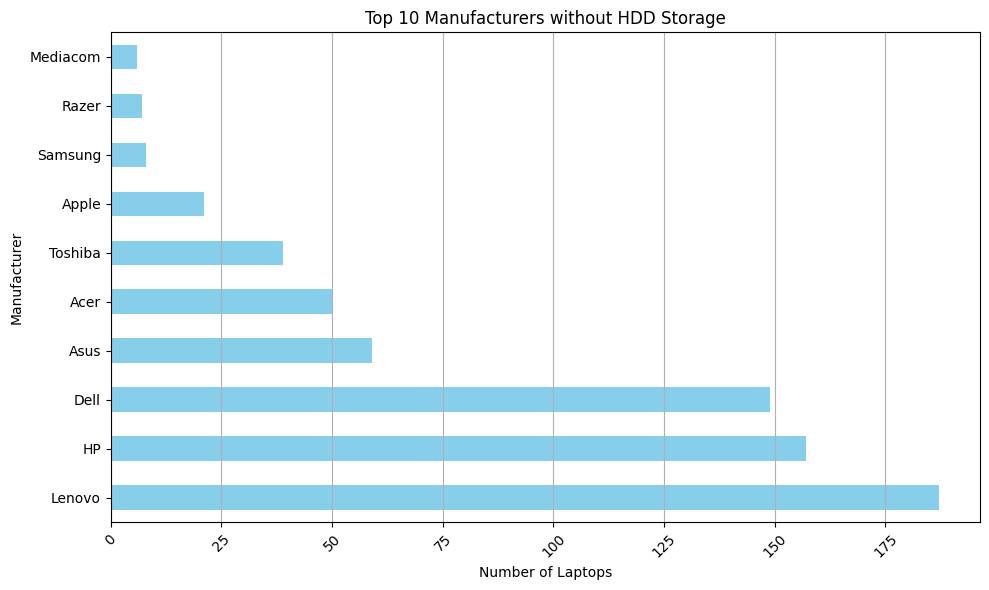

In [14]:
# Counts laptops by manufacturer  only for laptops without HHD storage
laptops[laptops["storage_hdd_gb"] == 0]["manufacturer"].value_counts().head(10).plot(kind="barh", figsize=(10, 6), color="skyblue")
plt.title("Top 10 Manufacturers without HDD Storage")
plt.xlabel("Number of Laptops")
plt.ylabel("Manufacturer")
plt.xticks(rotation=45)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

## Copy-on-Write (CoW)

> Copy-on-Write will become the default in pandas 3.0. We recommend turning it on now to benefit from all improvements. Copy-on-Write was first introduced in version 1.5.0. Starting from version 2.0 most of the optimizations that become possible through CoW are implemented and supported. All possible optimizations are supported starting from pandas 2.1. **CoW will be enabled by default in version 3.0.**

CoW will lead to more predictable behavior since it is not possible to update more than one object with one statement, e.g. indexing operations or methods won’t have side-effects. Additionally, through delaying copies as long as possible, the average performance and memory usage will improve.

**Previous behavior**

pandas indexing behavior is tricky to understand. Some operations return views while other return copies. Depending on the result of the operation, mutating one object might accidentally mutate another:

In [15]:
df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
df

,foo,bar
0,1,4
1,2,5
2,3,6


In [16]:
subset = df["foo"]
subset.iloc[0] = 100
df

,foo,bar
0,100,4
1,2,5
2,3,6


Mutating subset, e.g. updating its values, also updates df. The exact behavior is hard to predict. Copy-on-Write solves accidentally modifying more than one object, it explicitly disallows this. With CoW enabled, df is unchanged:

In [17]:
pd.options.mode.copy_on_write = True

In [18]:
df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
subset = df["foo"]
subset.iloc[0] = 10
df

,foo,bar
0,1,4
1,2,5
2,3,6


In [19]:
pd.options.mode.copy_on_write = False

In [20]:
df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
subset = df["foo"]
subset.iloc[0] = 10
df

,foo,bar
0,10,4
1,2,5
2,3,6


- https://pandas.pydata.org/docs/user_guide/indexing.html#returning-a-view-versus-a-copy
- https://pandas.pydata.org/docs/user_guide/copy_on_write.html#copy-on-write

## Data Aggregation

In the world of data analysis, you often work with large datasets containing many rows of detailed information. However, for decision-making or further analysis, you usually don’t need to inspect every individual record. Instead, you need to summarize or aggregate the data to:
- Reveal Trends: Understand the overall performance (e.g., total sales, average ratings) rather than just individual data points.
- Compare Groups: Compare different categories, such as sales by region or performance by department.
- Simplify Analysis: Reduce the data to a manageable size while preserving essential patterns.
- Enhance Reporting: Create meaningful summaries that are easy to visualize and interpret.

Data aggregation helps to condense your dataset, making it easier to draw insights and take informed actions.

Before diving into the groupby method, it’s important to understand the **split-apply-combine** strategy—a common paradigm in data analysis that underlies many aggregation techniques.
- **Split**: Divide the dataset into groups based on one or more key variables (for example, grouping sales records by store).
- **Apply**: Perform an operation on each group independently. This could be a statistical function like sum, mean, or even a custom transformation.
- **Combine**: Merge the individual results from each group back into a single data structure.

This strategy allows analysts to work on each group separately and then bring the results together in a concise summary.

{'Netbook': np.float32(673.3826), 'Notebook': np.float32(789.24585), '2 in 1 Convertible': np.float32(1289.7145), 'Ultrabook': np.float32(1556.676), 'Gaming': np.float32(1731.3806), 'Workstation': np.float32(2280.359)}


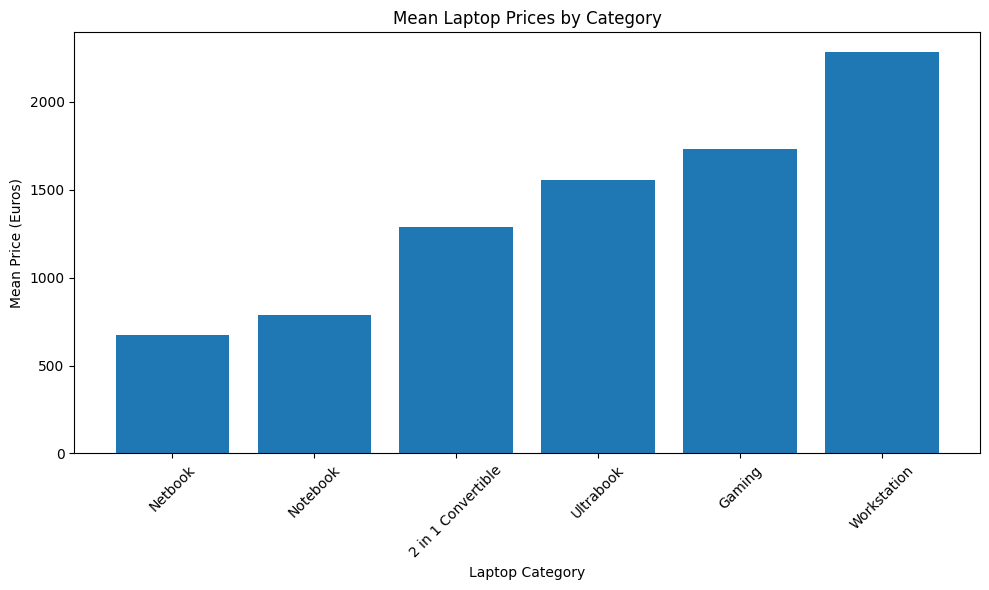

In [21]:
# To better understand what split-apply-combine is doing, here's a manual
# implementation using a for loop.
# Don't use this in practice, it's just for illustration.

mean_prices = {}

for laptop_category in laptops["category"].unique():
    category_group = laptops[laptops["category"] == laptop_category]
    mean_price = category_group["price_euros"].mean()
    mean_prices[laptop_category] = mean_price

print(mean_prices)

# Plot the mean prices for each category
plt.figure(figsize=(10, 6))
plt.bar(mean_prices.keys(), mean_prices.values())
plt.xlabel("Laptop Category")
plt.ylabel("Mean Price (Euros)")
plt.title("Mean Laptop Prices by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pandas implements the split-apply-combine strategy using its powerful `groupby` method. Here’s what happens under the hood:
- **Splitting the Data**: When you call `df.groupby('Column')`, pandas scans the specified column and divides the DataFrame into subsets, where each subset contains rows sharing the same value in that column.
- **Applying a Function**: Once the data is split, you can apply a function to each group. This function could be an aggregation (like sum, mean, min, or max), a transformation (like scaling or normalizing), or even a filtering function. Pandas efficiently applies these operations to each subset.
- **Combining the Results**: After the function is applied, pandas combines the output into a new DataFrame or Series. This new structure presents the aggregated results in a clear, tabular format.

The elegance of groupby is that it abstracts away the need for explicit loops, providing a more efficient and readable approach to data aggregation.

Suppose you have a dataset of sales records for different stores. You want to calculate the total sales per store.

In [22]:
data = {"Store": ["A", "A", "B", "B", "C", "C"], "Sales": [100, 200, 150, 250, 300, 400]}
df = pd.DataFrame(data)

# Group by 'Store' and sum the 'Sales'
total_sales = df.groupby("Store")["Sales"].sum()

print("Total sales per store:")
total_sales

Total sales per store:


Store
A    300
B    400
C    700
Name: Sales, dtype: int64

In [23]:
print(laptops.groupby("category", observed=True).groups)

{'2 in 1 Convertible': [34, 53, 62, 83, 105, 108, 114, 199, 200, 217, 233, 262, 316, 323, 333, 339, 345, 347, 353, 365, 367, 373, 382, 388, 398, 432, 457, 471, 476, 479, 484, 498, 501, 510, 512, 514, 517, 523, 524, 539, 542, 555, 568, 588, 612, 645, 649, 650, 653, 673, 682, 696, 708, 714, 759, 767, 780, 806, 810, 844, 850, 859, 863, 864, 866, 871, 884, 894, 910, 914, 919, 959, 960, 964, 965, 996, 1006, 1008, 1011, 1019, 1020, 1033, 1034, 1044, 1050, 1060, 1061, 1065, 1066, 1069, 1072, 1075, 1078, 1082, 1084, 1106, 1107, 1108, 1123, 1129, ...], 'Gaming': [400, 408, 463, 478, 491, 499, 500, 506, 515, 520, 541, 547, 549, 564, 571, 577, 589, 594, 602, 604, 608, 633, 637, 641, 643, 644, 646, 647, 651, 652, 663, 668, 670, 674, 678, 690, 695, 702, 710, 717, 723, 725, 732, 739, 743, 744, 752, 758, 761, 769, 774, 775, 776, 777, 779, 786, 789, 790, 792, 793, 795, 799, 801, 804, 805, 807, 809, 824, 827, 828, 829, 831, 836, 840, 842, 845, 853, 857, 861, 862, 865, 869, 870, 874, 877, 878, 883, 886,

In [24]:
# Get maximum price for each category
max_prices = laptops.groupby("category", observed=True)["price_euros"].max()
max_prices

category
2 in 1 Convertible    2824.0
Gaming                6099.0
Netbook               1908.0
Notebook              4899.0
Ultrabook             3100.0
Workstation           4389.0
Name: price_euros, dtype: Float32

You can also perform multiple operations on grouped data at once. 

In [25]:
def dif(group):
    return group.max() - group.min()


laptops.groupby("category", observed=True)["price_euros"].agg(["mean", "max", "median", "std", dif])

,mean,max,median,std,dif
category,,,,,
2 in 1 Convertible,1289.714478,2824.0,1199.0,617.436646,2549.0
Gaming,1731.380615,6099.0,1492.800049,814.174438,5400.0
Netbook,673.382629,1908.0,355.0,592.093384,1734.0
Notebook,789.24585,4899.0,696.5,446.941772,4703.0
Ultrabook,1556.676025,3100.0,1499.0,484.737335,2601.0
Workstation,2280.358887,4389.0,2064.899902,712.643555,3020.0


Data aggregation is a vital step in the data analysis process, as it transforms large, detailed datasets into meaningful summaries. The split-apply-combine strategy is the conceptual framework behind many aggregation techniques.

In [26]:
# Exercise 1: Are laptops made by Apple more expensive than those made by
# other manufacturers?
laptops.groupby("manufacturer", observed=False)["price_euros"].mean().sort_values(ascending=False)

manufacturer
Razer                       3346.142822
LG                               2099.0
Micro-Star International    1728.908081
Google                      1677.666626
Microsoft                   1612.308228
Apple                       1564.198608
Huawei                           1424.0
Samsung                     1413.444458
Toshiba                       1267.8125
Dell                        1199.225098
Xiaomi                      1133.462524
Asus                        1128.391602
Lenovo                      1093.862183
HP                          1080.314697
Fujitsu                           729.0
Acer                         633.464478
Chuwi                        314.296661
Mediacom                          295.0
Vero                         217.425003
Name: price_euros, dtype: Float32

In [27]:
# Exercise 2: What is the best value laptop with a screen size of 38 cm or more?
cols_to_show = ["manufacturer", "model_name", "price_euros", "screen_size_cm"]
best_value_laptop = laptops.loc[laptops["screen_size_cm"] >= 38, cols_to_show].sort_values("price_euros")
print(f"Best value laptop is {best_value_laptop.iloc[0]['manufacturer']} {best_value_laptop.iloc[0]['model_name']} with price {best_value_laptop.iloc[0]['price_euros']} euros")
best_value_laptop.head()

Best value laptop is Acer Chromebook C910-C2ST with price 199.0 euros


,manufacturer,model_name,price_euros,screen_size_cm
3,Acer,Chromebook C910-C2ST,199.0,39.624001
7,Acer,Chromebook 15,209.0,39.624001
9,Asus,A541NA-GO342,224.0,39.624001
13,Chuwi,"LapBook 15.6""",244.990005,39.624001
15,Chuwi,"Lapbook 15,6",248.899994,39.624001


In [28]:
# Exercise 3: Which laptop has the most RAM?
cols_to_show = ["manufacturer", "model_name", "ram_gb"]
most_ram_laptop = laptops.loc[laptops["ram_gb"] == laptops["ram_gb"].max(), cols_to_show]
most_ram_laptop

,manufacturer,model_name,ram_gb
1268,Asus,ROG G701VO,64


## Reshaping Data: Melting and Pivoting

## End-to-End EDA Workflow